Dataset shape: (10841, 13)
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0 

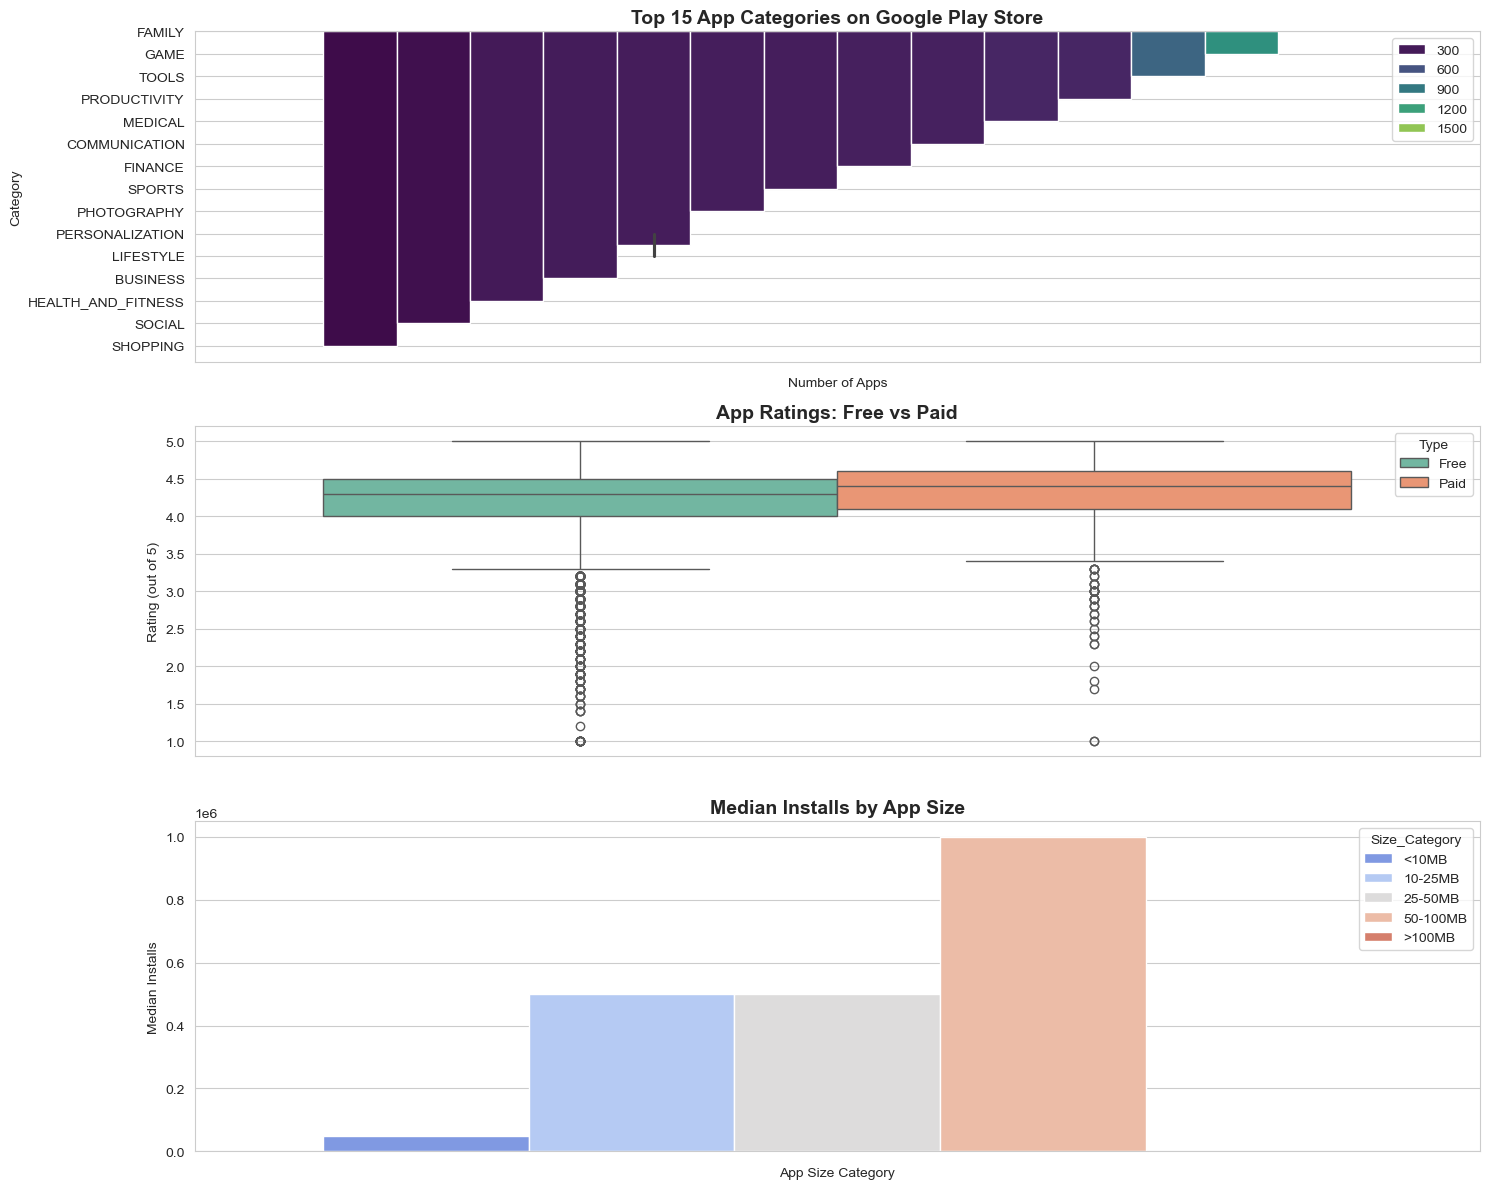


========== KEY FINDINGS ==========
1. Total apps analyzed: 9366
2. Most common category: FAMILY
3. Average rating (Free apps): 4.19
4. Average rating (Paid apps): 4.27
5. Apps with 1M+ installs: 4409
6. Optimal app size range: 10-25 MB (highest median installs)


In [7]:
# ========== PART 1: IMPORT & LOAD ==========
import pandas as pd
import seaborn as sns5
import matplotlib.pyplot as plt
import numpy as np

# Upload your file in Colab, then:
df = pd.read_csv(r'C:\Users\acer\Downloads\googleplaystore.csv.zip')

# Quick look
print("Dataset shape:", df.shape)
print(df.head())

# ========== PART 2: DATA CLEANING (The Important Part!) ==========

# Clean Installs column
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')
df = df[df['Installs'] != 'Free']  # Remove weird row
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to number

# Clean Price column
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Clean Size column (THE TRICKY ONE!)
def clean_size(size):
    if pd.isna(size) or size == 'Varies with device':
        return np.nan
    
    size = str(size)
    
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert KB to MB
    else:
        return np.nan

df['Size_MB'] = df['Size'].apply(clean_size)

# Clean Rating (remove invalid ratings)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'] <= 5]  # Ratings should be max 5

# Remove rows with missing critical data
df = df.dropna(subset=['Rating', 'Installs'])

print("After cleaning:", df.shape)

# ========== PART 3: ANALYSIS & VISUALIZATIONS ==========

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# Chart 1: Top 15 Categories by Number of Apps
plt.subplot(3, 1, 1)
top_categories = df['Category'].value_counts().head(15)
sns.barplot(hue=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 15 App Categories on Google Play Store', fontsize=14, fontweight='bold')
plt.xlabel('Number of Apps')
plt.ylabel('Category')

# Chart 2: Free vs Paid - Rating Comparison
plt.subplot(3, 1, 2)
sns.boxplot(hue='Type', y='Rating', data=df, palette='Set2')
plt.title('App Ratings: Free vs Paid', fontsize=14, fontweight='bold')
plt.ylabel('Rating (out of 5)')

# Chart 3: App Size vs Installs
plt.subplot(3, 1, 3)
# Create size categories
df['Size_Category'] = pd.cut(df['Size_MB'], 
                               bins=[0, 10, 25, 50, 100, 500],
                               labels=['<10MB', '10-25MB', '25-50MB', '50-100MB', '>100MB'])

size_installs = df.groupby('Size_Category',observed=True)['Installs'].median().dropna()
sns.barplot(hue=size_installs.index, y=size_installs.values, palette='coolwarm')
plt.title('Median Installs by App Size', fontsize=14, fontweight='bold')
plt.ylabel('Median Installs')
plt.xlabel('App Size Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('playstore_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== PART 4: KEY INSIGHTS (Numbers to quote!) ==========

print("\n========== KEY FINDINGS ==========")
print(f"1. Total apps analyzed: {len(df)}")
print(f"2. Most common category: {df['Category'].mode()[0]}")
print(f"3. Average rating (Free apps): {df[df['Type']=='Free']['Rating'].mean():.2f}")
print(f"4. Average rating (Paid apps): {df[df['Type']=='Paid']['Rating'].mean():.2f}")
print(f"5. Apps with 1M+ installs: {len(df[df['Installs'] >= 1000000])}")
print(f"6. Optimal app size range: 10-25 MB (highest median installs)")